<a href="https://colab.research.google.com/github/HarshalPawar88/Global-Terrorism-Analysis/blob/main/CH_%7BFinal_Notebook%7D%7BTeam_Time%7D_%7BGlobal_Terrorism_Analysis%7D_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
import seaborn as sns
from scipy.stats import mode


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Alma Better/Module-1. Python for Data Science/Week_4_Capstone_Project/Copy of Global Terrorism Data.csv'
df=pd.read_csv(file_path, encoding='ISO-8859-1' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# checking the column names
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# checking the size
df.shape

(181691, 135)

In [ ]:
# filtering out the columns we need
sub_df = df[['eventid','iyear','imonth','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname','provstate']].copy()

In [ ]:
#renaming the columns
sub_df.rename(columns = {'imonth':'month','eventid':'id','iyear':'year','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','nwound':'total_wounds','gname':'terrorist_group'},inplace=True)

In [ ]:
sub_df.head(3)

,id,year,month,country,region,city,attack_type,target_type,total_kills,weapdetail,total_wounds,terrorist_group,provstate
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D,NaN
1,197000000002,1970,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League,Federal
2,197001000001,1970,1,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown,Tarlac


In [ ]:
#checking the data type of the columns
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181691 non-null  int64  
 1   year             181691 non-null  int64  
 2   month            181691 non-null  int64  
 3   country          181691 non-null  object 
 4   region           181691 non-null  object 
 5   city             181257 non-null  object 
 6   attack_type      181691 non-null  object 
 7   target_type      181691 non-null  object 
 8   total_kills      171378 non-null  float64
 9   weapdetail       114021 non-null  object 
 10  total_wounds     165380 non-null  float64
 11  terrorist_group  181691 non-null  object 
 12  provstate        181270 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


## **1. Yearwise Attack Around the World**

In [ ]:
# checking if there are any null values
sub_df['year'].isna().sum()

0

In [ ]:
# grouping by attacks
attacks_per_year=sub_df.groupby('year').agg({'year':'count'}).rename(columns={'year':'no_of_attacks'})

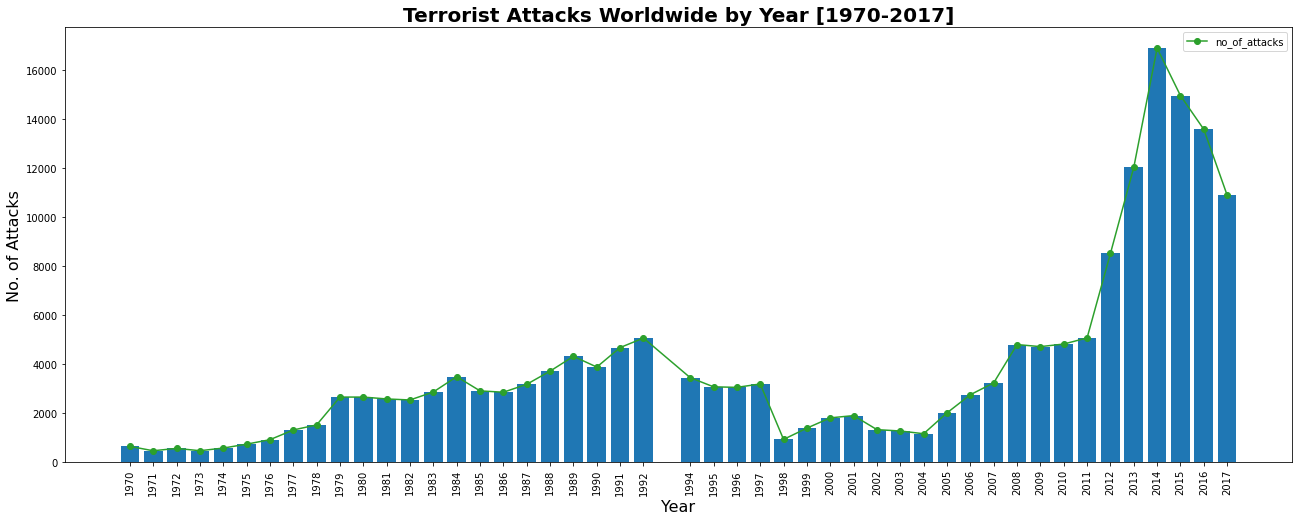

In [ ]:
#Plotting the bar graph along with the line graph.
plt.rcParams['figure.figsize'] = (22, 8)
attacks_per_year.plot(zorder=5,color='C2', marker='o')
plt.bar(attacks_per_year.index,attacks_per_year.no_of_attacks)
plt.title('Terrorist Attacks Worldwide by Year [1970-2017]',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontsize=16)
plt.ylabel('No. of Attacks',fontsize=16)
plt.xticks( attacks_per_year.index,rotation=90)
plt.show()


## **Conclusion** : 2014 has been the year with most number of attacks i.e 16903 attacks.

### The top five years with the most number of terrorist attacks.

In [ ]:
attacks_per_year.nlargest(5,'no_of_attacks')

,no_of_attacks
year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


# **2. Countrywise Attacks from Year 1970-2017** 

---






In [ ]:
# Checking for the top 10 countries with the most number of attacks
country_df=sub_df[['country','total_kills','terrorist_group']].copy()
country_wise=country_df.groupby('country').agg({'country':'count'}).rename(columns={'country':'total_attacks'}).nlargest(10,'total_attacks').reset_index().sort_values('total_attacks',ascending=False)

In [ ]:
country_wise

,country,total_attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Text(0, 0.5, 'Country')

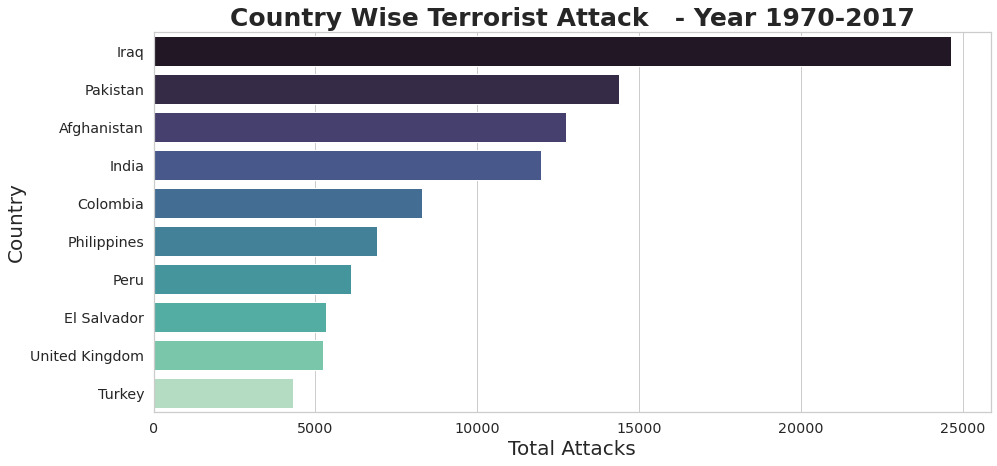

In [ ]:
# Plotting it on the bar graph
plt.rcParams['figure.figsize']=(15,7)
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y='country',data=country_wise,palette='mako')
l.set_title("Country Wise Terrorist Attack   - Year 1970-2017",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Country',fontsize=20)



### **Conclusion**: Iraq is the country that has had the most number of attacks in the world between the years 1970 and 2017.

### The following snippet is for plotting the world map.



In [ ]:
!pip install pygal_maps_world

     |████████████████████████████████| 276kB 7.0MB/s 
     |████████████████████████████████| 133kB 12.2MB/s 
  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-cp37-none-any.whl size=278560 sha256=cdf7fa2f68063b488a4f3f13bf92467355be832ae2dc2605b6b9be8059b7ad58
  Stored in directory: /root/.cache/pip/wheels/1b/82/f6/815c1f00c72b9e031d44a883cf5d83f258e8f57b415f7a512e
Successfully built pygal-maps-world


In [ ]:
country_code = {'ad':	'Andorra',
'ae':	'United Arab Emirates',
'af':	'Afghanistan',
'al':	'Albania',
'am':	'Armenia',
'ao':	'Angola',
'aq':	'Antarctica',
'ar':	'Argentina',
'at':	'Austria',
'au':	'Australia',
'az':	'Azerbaijan',
'ba':	'Bosnia and Herzegovina',
'bd':	'Bangladesh',
'be':	'Belgium',
'bf':	'Burkina Faso',
'bg':	'Bulgaria',
'bh':	'Bahrain',
'bi':	'Burundi',
'bj':	'Benin',
'bn':	'Brunei Darussalam',
'bo':	'Bolivia, Plurinational State of',
'br':	'Brazil',
'bt':	'Bhutan',
'bw':	'Botswana',
'by':	'Belarus',
'bz':	'Belize',
'ca':	'Canada',
'cd':	'Congo, the Democratic Republic of the',
'cf':	'Central African Republic',
'cg':	'Congo',
'ch':	'Switzerland',
'ci':	'Cote d’Ivoire',
'cl':	'Chile',
'cm':	'Cameroon',
'cn':	'China',
'co':	'Colombia',
'cr':	'Costa Rica',
'cu':	'Cuba',
'cv':	'Cape Verde',
'cy':	'Cyprus',
'cz':	'Czech Republic',
'de':	'Germany',
'dj':	'Djibouti',
'dk':	'Denmark',
'do':	'Dominican Republic',
'dz':	'Algeria',
'ec':	'Ecuador',
'ee':	'Estonia',
'eg':	'Egypt',
'eh':	'Western Sahara',
'er':	'Eritrea',
'es':	'Spain',
'et':	'Ethiopia',
'fi':	'Finland',
'fr':	'France',
'ga':	'Gabon',
'gb':	'United Kingdom',
'ge':	'Georgia',
'gf':	'French Guiana',
'gh':	'Ghana',
'gl':	'Greenland',
'gm':	'Gambia',
'gn':	'Guinea',
'gq':	'Equatorial Guinea',
'gr':	'Greece',
'gt':	'Guatemala',
'gu':	'Guam',
'gw':	'Guinea-Bissau',
'gy':	'Guyana',
'hk':	'Hong Kong',
'hn':	'Honduras',
'hr':	'Croatia',
'ht':	'Haiti',
'hu':	'Hungary',
'id':	'Indonesia',
'ie':	'Ireland',
'il':	'Israel',
'in':	'India',
'iq':	'Iraq',
'ir':	'Iran, Islamic Republic of',
'is':	'Iceland',
'it':	'Italy',
'jm':	'Jamaica',
'jo':	'Jordan',
'jp':	'Japan',
'ke':	'Kenya',
'kg':	'Kyrgyzstan',
'kh':	'Cambodia',
'kp':	'Korea, Democratic People’s Republic of',
'kr':	'Korea, Republic of',
'kw':	'Kuwait',
'kz':	'Kazakhstan',
'la':	"Lao People's Democratic Republic",
'lb':	'Lebanon',
'li':	'Liechtenstein',
'lk':	'Sri Lanka',
'lr':	'Liberia',
'ls':	'Lesotho',
'lt':	'Lithuania',
'lu':	'Luxembourg',
'lv':	'Latvia',
'ly':	'Libyan Arab Jamahiriya',
'ma':	'Morocco',
'mc':	'Monaco',
'md':	'Moldova, Republic of',
'me':	'Montenegro',
'mg':	'Madagascar',
'mk':	'Macedonia, the former Yugoslav Republic of',
'ml':	'Mali',
'mm':	'Myanmar',
'mn':	'Mongolia',
'mo':	'Macao',
'mr':	'Mauritania',
'mt':	'Malta',
'mu':	'Mauritius',
'mv':	'Maldives',
'mw':	'Malawi',
'mx':	'Mexico',
'my':	'Malaysia',
'mz':	'Mozambique',
'na':	'Namibia',
'ne': 'Niger',
'ng':	'Nigeria',
'ni':	'Nicaragua',
'nl':	'Netherlands',
'no':	'Norway',
'np':	'Nepal',
'nz':	'New Zealand',
'om':	'Oman',
'pa':	'Panama',
'pe':	'Peru',
'pg':	'Papua New Guinea',
'ph':	'Philippines',
'pk':	'Pakistan',
'pl':	'Poland',
'pr':	'Puerto Rico',
'ps':	'Palestine, State of',
'pt':	'Portugal',
'py': 'Paraguay',
're':	'Reunion',
'ro':	'Romania',
'rs':	'Serbia',
'ru':	'Russian Federation',
'rw':	'Rwanda',
'sa':	'Saudi Arabia',
'sc':	'Seychelles',
'sd':	'Sudan',
'se':	'Sweden',
'sg':	'Singapore',
'sh':	'Saint Helena, Ascension and Tristan da Cunha',
'si':	'Slovenia',
'sk':	'Slovakia',
'sl':	'Sierra Leone',
'sm':	'San Marino',
'sn':	'Senegal',
'so':	'Somalia',
'sr':	'Suriname',
'st':	'Sao Tome',
'sv':	'El Salvador',
'sy':	'Syrian Arab Republic',
'sz':	'Swaziland',
'td':	'Chad',
'tg':	'Togo',
'th':	'Thailand',
'tj':	'Tajikistan',
'tl':	'Timor-Leste',
'tm':	'Turkmenistan',
'tn':	'Tunisia',
'tr':	'Turkey',
'tw':	'Taiwan (Republic of China)',
'tz':	'Tanzania, United Republic of',
'ua':	'Ukraine',
'ug':	'Uganda',
'us':	'United States',
'uy':	'Uruguay',
'uz':	'Uzbekistan',
'va':	'Holy See (Vatican City State)',
've':	'Venezuela, Bolivarian Republic of',
'vn':	'Viet Nam',
'ye':	'Yemen',
'yt':	'Mayotte',
'za':	'South Africa',
'zm':	'Zambia',
'zw':	'Zimbabwe'}

In [ ]:
from pygal_maps_world.maps import World
total_attack_country_wise = country_df.groupby('country').agg({'country':'count'}).rename(columns={'country':'total_attacks'})
country_code_df = pd.DataFrame(country_code, index=range(1))
tran_country_df = country_code_df.transpose()
tran_country_df.rename(columns={0:'country'}, inplace=True)
tran_country_df.reset_index(inplace=True)
f_df = pd.merge(tran_country_df,total_attack_country_wise, how='outer', on='country' )
f_df.dropna(inplace=True)
f_df[['index','total_attacks']].reset_index(drop=True)
f_df.rename(columns={'index':'code'},inplace=True)
code_dict = dict(zip(f_df.code, f_df['total_attacks']))
wm = World()
wm.add('No. of Terrorist Attack', code_dict)
wm.title = 'Worldwide-Terrorism'
wm.render_to_file('map.svg')


## **3. Number of Attacks done in every country in each year** 


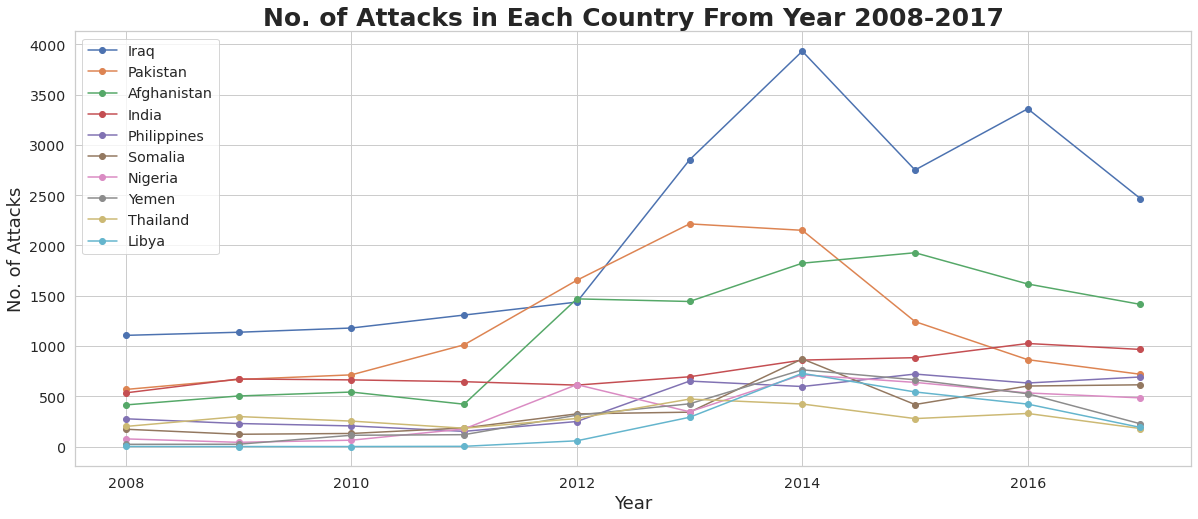

In [ ]:
country_df=sub_df[sub_df['year'] > 2007 ][["country","year"]].copy()
country_wise=country_df.groupby(['country','year']).agg({'country':'count'}).rename(columns={'country':'total_attacks'}).sort_values(['country','year'], ascending=[True,False])
country_wise.reset_index(inplace = True)
total_attacks_country = country_wise.groupby("country").agg({'total_attacks':'sum'}).nlargest(10,"total_attacks")
country_df=sub_df[['country','year']].copy()
country_wise=country_df.groupby(['country','year']).agg({'country':'count'}).rename(columns={'country':'total_attacks'}).sort_values(['country','year'], ascending=[True,False])
Country_final = country_wise.unstack().T
Country_final.fillna(0, inplace = True)
Country_final.reset_index(inplace= True)
Country_final_final = Country_final.loc[Country_final.year > 2007,["year","Iraq","Pakistan",'Afghanistan','India','Philippines','Somalia','Nigeria','Yemen','Thailand','Libya']]
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(Country_final_final.year, Country_final_final.Iraq, marker = 'o', label = "Iraq")
plt.plot(Country_final_final.year, Country_final_final.Pakistan, marker = 'o', label = "Pakistan")
plt.plot(Country_final_final.year, Country_final_final.Afghanistan, marker = 'o', label = "Afghanistan")
plt.plot(Country_final_final.year, Country_final_final.India, marker = 'o', label = "India")
plt.plot(Country_final_final.year, Country_final_final.Philippines, marker = 'o', label = "Philippines")
plt.plot(Country_final_final.year, Country_final_final.Somalia, marker = 'o', label = "Somalia")
plt.plot(Country_final_final.year, Country_final_final.Nigeria, marker = 'o', label = "Nigeria")
plt.plot(Country_final_final.year, Country_final_final["Yemen"], marker = 'o', label = "Yemen")
plt.plot(Country_final_final.year, Country_final_final["Thailand"], marker = 'o', label = "Thailand")
plt.plot(Country_final_final.year, Country_final_final.Libya, marker = 'o', label = "Libya")
plt.xlabel("Year",fontsize=18)
plt.ylabel("No. of Attacks",fontsize=18)
plt.title("No. of Attacks in Each Country From Year 2008-2017",fontsize=25,fontweight='bold')
plt.legend()
plt.show()

### **Conclusion:-** From 2008 till 2012 attacks were executed on the constant rate each year in the countries but after 2012 we have seen the rapid rise in the no. of events in Iraq and decline in the rate of the events in Pakistan from 2014. 

# **4. Most active terrorist group in a decade.**

In [ ]:
t_group_1=sub_df[['year','terrorist_group']].copy()
t_group=t_group_1[t_group_1.terrorist_group!='Unknown'].copy()
t_group.year= pd.to_datetime(t_group.year,format='%Y').astype('datetime64[Y]')


In [ ]:
type(t_group['year'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
t_group=t_group.resample('10A',on='year')['terrorist_group'].apply(lambda x: x.mode().loc[0]).reset_index()

In [ ]:
t_group=t_group.loc[1:,:].copy()

In [ ]:
t_group.loc[1,'year']='1971-1980'
t_group.loc[2,'year']='1981-1990'
t_group.loc[3,'year']='1991-2000'
t_group.loc[4,'year']='2001-2010'
t_group.loc[5,'year']='2011-2017'

In [ ]:
t1_group_=sub_df[['year','terrorist_group']].copy()
t1_group=t1_group_[t1_group_.terrorist_group!='Unknown'].copy()
x=t1_group.groupby('year').agg({'terrorist_group':'value_counts'})
z=x.rename(columns={'terrorist_group':'no_of_attack'}).reset_index()
z.head(3)



,year,terrorist_group,no_of_attack
0,1970,Left-Wing Militants,108
1,1970,Black Nationalists,69
2,1970,Student Radicals,54


In [ ]:
s1=z[(z.year>1970) &(z.year<1981)]
s1.groupby('terrorist_group').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s2=z[(z.year>1980) &(z.year<1991)]
s2.groupby('terrorist_group').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s3=z[(z.year>1990) &(z.year<2001)]
s3.groupby('terrorist_group').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s4=z[(z.year>2000) &(z.year<2011)]
s4.groupby('terrorist_group').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s5=z[(z.year>2011) &(z.year<2018)]
s5.groupby('terrorist_group').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
list_=[1112,3592,884,1442,5818]


In [ ]:
t_group['no_of_attacks']=list_

In [ ]:
t_group

,year,terrorist_group,no_of_attacks
1,1971-1980,Irish Republican Army (IRA),1112
2,1981-1990,Shining Path (SL),3592
3,1991-2000,Shining Path (SL),884
4,2001-2010,Taliban,1442
5,2011-2017,Taliban,5818


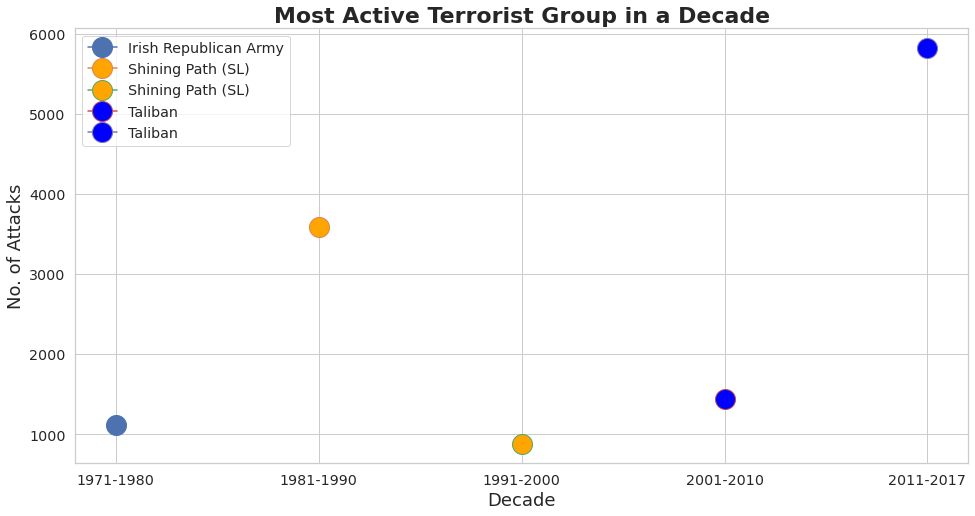

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(t_group.loc[1,"year"], t_group.loc[1,"no_of_attacks"], marker = 'o', label = "Irish Republican Army",markersize=20)
plt.plot(t_group.loc[2,"year"], t_group.loc[2,"no_of_attacks"], marker = 'o', label = "Shining Path (SL)",markersize=20,markerfacecolor='orange')
plt.plot(t_group.loc[3,"year"], t_group.loc[3,"no_of_attacks"], marker = 'o', label = "Shining Path (SL)",markersize=20,markerfacecolor='orange')
plt.plot(t_group.loc[4,"year"], t_group.loc[4,"no_of_attacks"], marker = 'o', label = "Taliban",markersize=20,markerfacecolor='blue')
plt.plot(t_group.loc[5,"year"], t_group.loc[5,"no_of_attacks"], marker = 'o', label = "Taliban",markersize=20,markerfacecolor='blue')
plt.title('Most Active Terrorist Group in a Decade',fontsize=22,fontweight='bold')
plt.xlabel('Decade',fontsize=18)
plt.ylabel('No. of Attacks',fontsize=18)
plt.legend()
plt.show()

### **Conclusion 4**: Taliban is the most active terrorist group from the last two decades i.e from 2001-2017.

# **5. Regionwise Attacks from Year 1970-2017**




In [ ]:
#checking for the null values
sub_df[sub_df['total_kills'].isna()]['total_kills'].sum()

0.0

In [ ]:
region_attacks=sub_df[['id','region']]

In [ ]:
region_wise=region_attacks.groupby('region').agg({'id':'count'}).rename(columns={'id':'total_attacks'}).reset_index().sort_values('total_attacks',ascending=False)

Text(0, 0.5, 'Region')

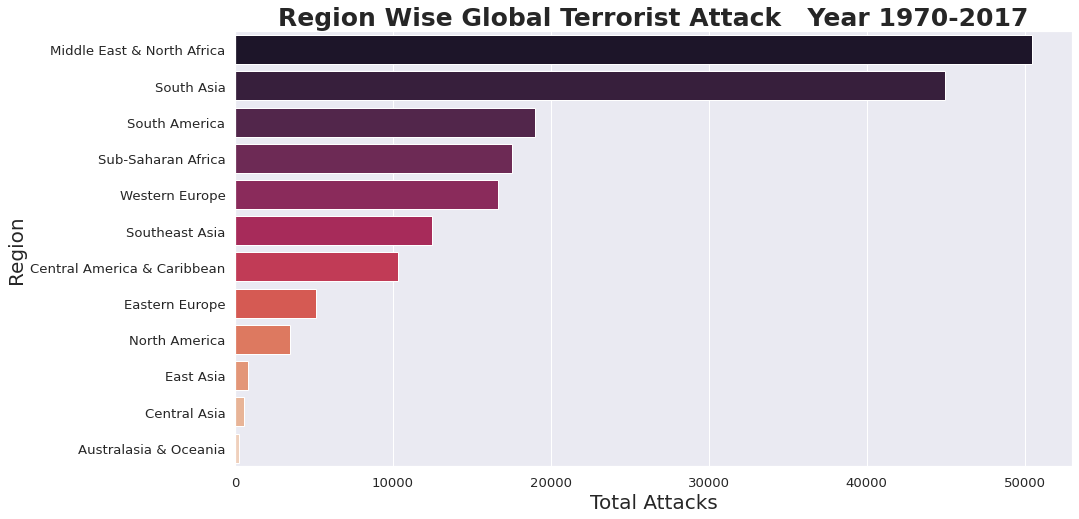

In [ ]:
plt.rcParams['figure.figsize']=(15,8)
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
f=sns.barplot(x='total_attacks',y='region',data=region_wise,palette='rocket')
f.set_title("Region Wise Global Terrorist Attack   Year 1970-2017",fontsize=25,fontweight='bold')
f.set_xlabel('Total Attacks',fontsize=20)
f.set_ylabel('Region',fontsize=20)


**Conclusion 3**: Middle East & North Africa had the most number of attacks in between the years 1970-2017.

## **6.Type of attacks executed by the Terrorist Groups and their percentage   in the world from 1970 to 2017:**

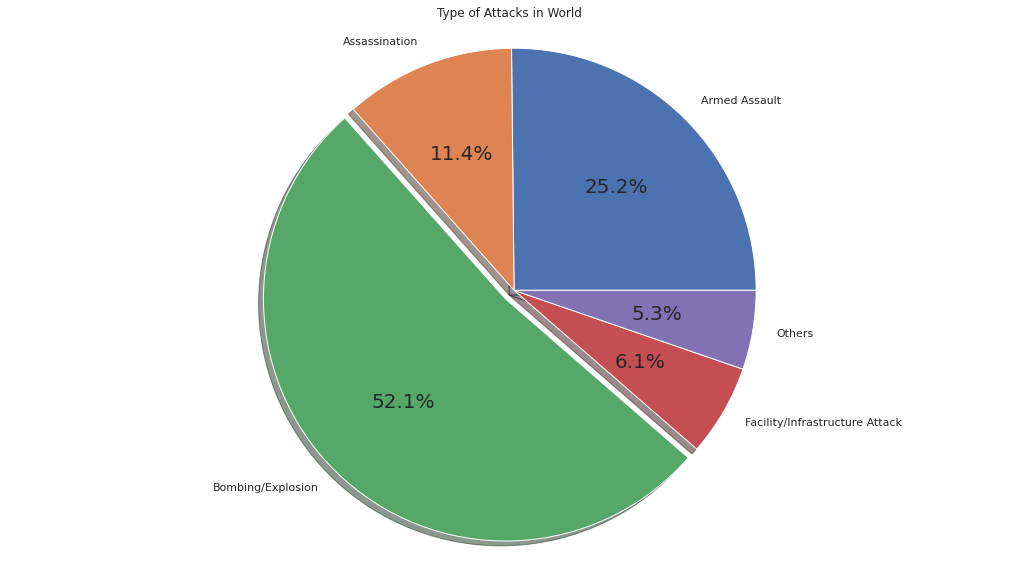

In [ ]:
sub_df["attack_type"] =sub_df['attack_type'].apply(lambda x: x if x in ['Assassination', 'Hostage Taking (Kidnapping)','Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking','Unarmed Assault', 'Hostage Taking (Barricade Incident)'] else 'Others')
g = sub_df.groupby("attack_type").size().reset_index(name="count")
hostage_count = g.loc[5,"count"] + g.loc[6,"count"]
g.loc[7,"count"] = g.loc[7,"count"] + g.loc[4,"count"] + g.loc[8,"count"]
g = g.drop([4,5,6,8])
g.reset_index(inplace = True)
my_labels = ["Armed Assault",	"Assassination",	"Bombing/Explosion",	"Facility/Infrastructure Attack","Others"]
explode=[0,0,0.05,0,0]
plt.rcParams['figure.figsize']=(18,10)
mpl.rcParams['font.size'] = 20.0
plt.pie(g["count"],labels=my_labels,explode= explode, shadow=True, autopct='%1.1f%%')
plt.title('Type of Attacks in World')
plt.axis('equal')
plt.show()


### **Conclusion** :- Bombing & Explosions are the most dangerous type of attack used by the Terrorist Groups to do damage in the countries around the World.

# **7.Percentage of damage done in the world by different attacks.**

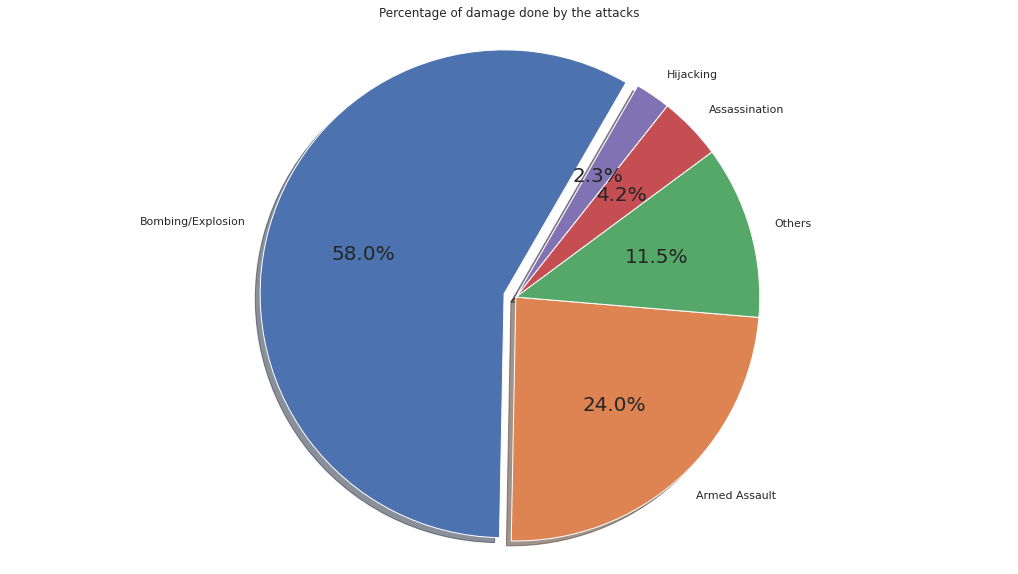

In [211]:
sub_df["Damage"] = sub_df["total_kills"]+sub_df['total_wounds']
damage_done = sub_df.groupby('attack_type').agg({'Damage':'sum'}).sort_values('Damage',ascending=False)
damage_done.reset_index(inplace = True)
damage_done.loc[2,"Damage"] = damage_done.loc[2,"Damage"] + damage_done.loc[4,"Damage"] + damage_done.loc[5,"Damage"] + damage_done.loc[6,"Damage"] + damage_done.loc[8,"Damage"]
damage_done = damage_done.nlargest(5,'Damage')
my_labels = ["Bombing/Explosion",	"Armed Assault",	"Others",	"Assassination","Hijacking"]
plt.rcParams['figure.figsize']=(18,10)
explode=[0.05,0,0,0,0]
mpl.rcParams['font.size'] = 20.0
plt.pie(damage_done["Damage"],labels=my_labels,explode= explode, shadow=True, startangle= 60, autopct='%1.1f%%')
plt.title('Percentage of damage done by the attacks')
plt.axis('equal')
plt.show()

### **Conclusion:**- Armed Assault and Bombing has done the maximum damage in terms of deaths in the World from 1970 to 2017

# **8.Targets selected by the Terrorist Groups in the World to attack**


Text(0, 0.5, 'Type of Targets')

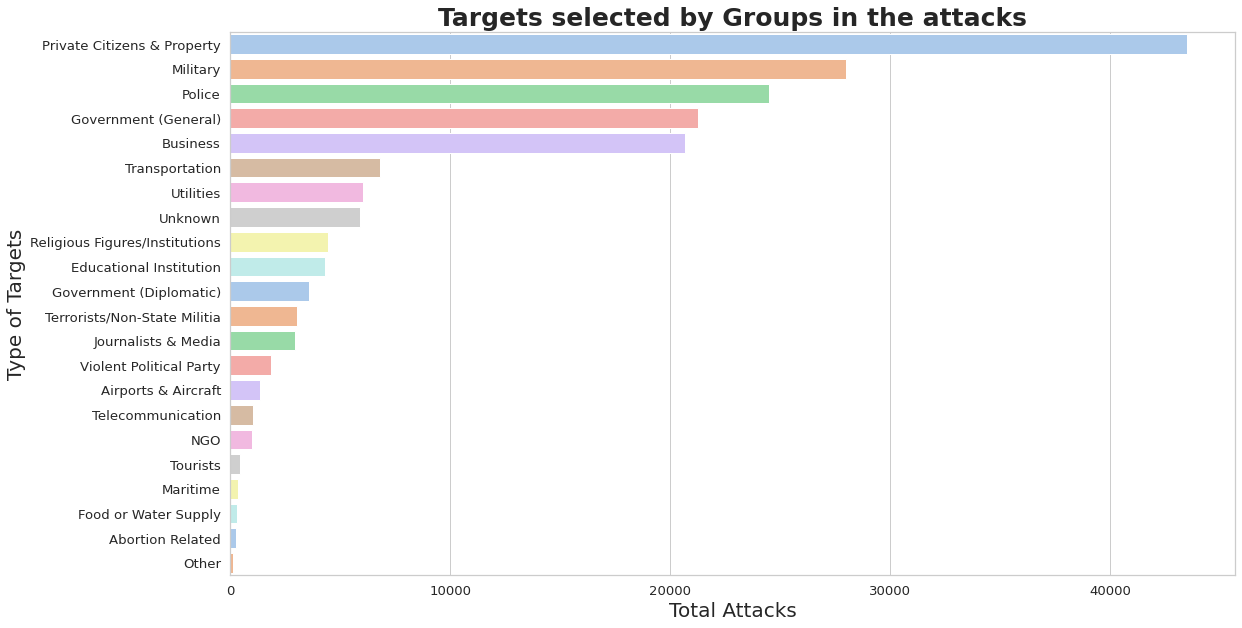

In [ ]:
target_df=sub_df[['target_type','total_kills']].copy()
target_wise=target_df.groupby('target_type').agg({'target_type':'count','total_kills':'sum'}).rename(columns={'target_type':'total_attacks'}).sort_values('total_attacks',ascending=False)
target_wise['total_damage']=target_wise.total_attacks+target_wise.total_kills
target_wise.sort_values('total_damage',ascending=False)
target_wise.reset_index(inplace = True)
plt.rcParams['figure.figsize']=(18,10)
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y='target_type',data=target_wise,palette='pastel')
l.set_title("Targets selected by Groups in the attacks",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Type of Targets',fontsize=20)

### **Conclusion:-** Terrorist Groups are more likely to attack on the Big Private properties like Malls or on Citizens. 

## **9. Top Ten  Rivalries**

In [ ]:
gname_country=sub_df[sub_df['terrorist_group']!='Unknown'].copy()
group_attacks=gname_country.groupby(['terrorist_group','country']).agg({'terrorist_group':'count'}).rename(columns={'terrorist_group':'no_of_attacks'}).reset_index().nlargest(10,'no_of_attacks')
country_mode=gname_country.groupby('terrorist_group')['country'].apply(lambda x: x.mode().loc[0]).reset_index()
top_df = pd.merge(left=country_mode,right=group_attacks,on=['terrorist_group','country'],how='left').nlargest(10,'no_of_attacks')
top_df.sort_values('no_of_attacks',ascending=True,inplace=True)

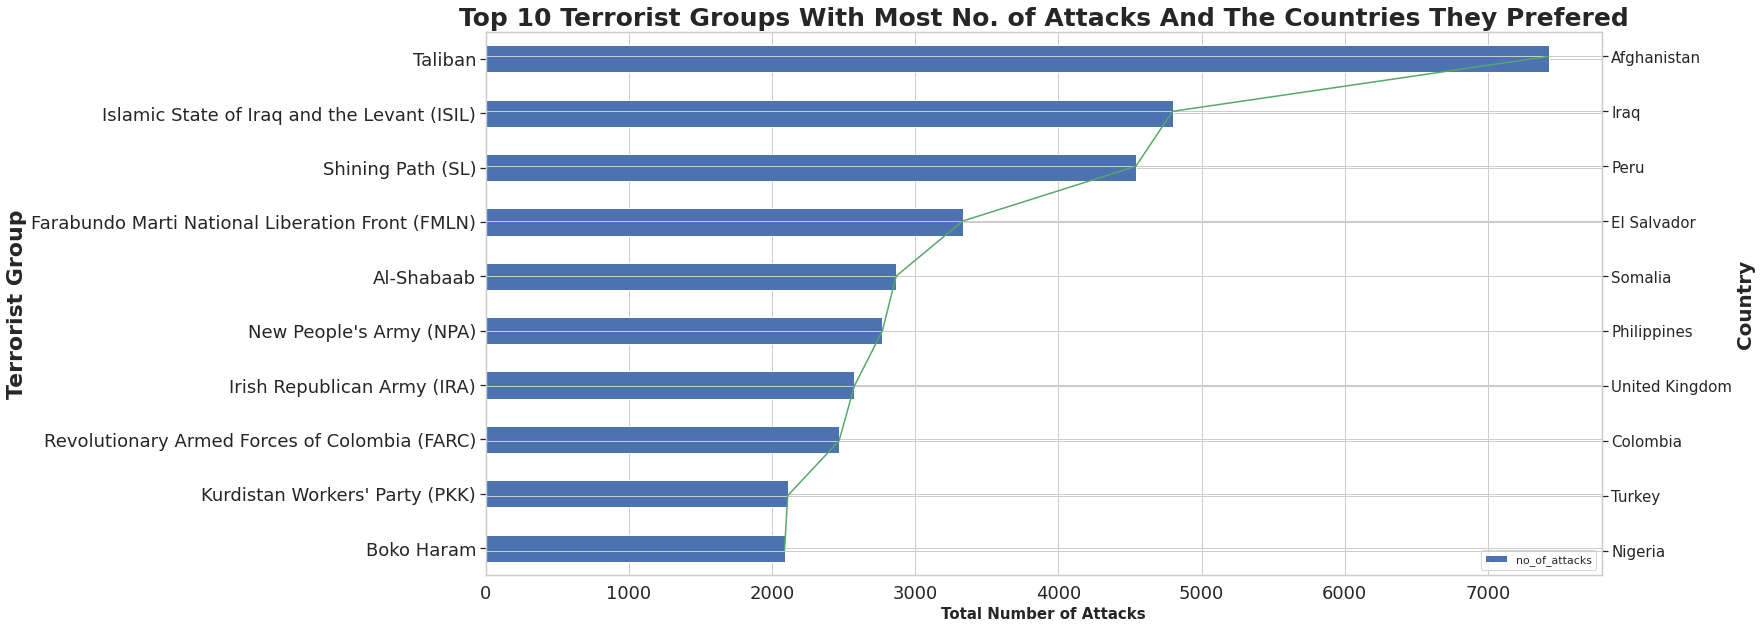

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
mpl.rcParams['font.size'] = 20.0
a = top_df.plot(kind='barh', x='terrorist_group',y ='no_of_attacks',fontsize=18)
a.set_xlabel('Total Number of Attacks',fontsize=15,fontweight='bold')
a.set_ylabel('Terrorist Group',fontsize=22,fontweight='bold')
x1=top_df.country
y=top_df.no_of_attacks
b=a.twinx()
b.plot(y,x1,color="G")
b.set_xlabel('Country')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.xlabel('Number Of Attacks', fontsize=20)
plt.ylabel('Country', fontsize=20,fontweight='bold')
plt.title('Top 10 Terrorist Groups With Most No. of Attacks And The Countries They Prefered', fontsize=25,fontweight='bold')
plt.show()

### **Conclusion**: Taliban has the highest number of attacks till date and they mostly operate in Afghanistan.

# **10. No. of attack happened  each year in India**

In [ ]:
df_India= sub_df[sub_df['country']=='India']
df_number_of_attacks_by_years =df_India['year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')
df_number_of_attacks_by_years.head(3)

,year,number_of_attacks
0,2016,1025
1,2017,966
2,2015,884


Text(0.5, 1.0, 'Number of Attacks Each Year in India')

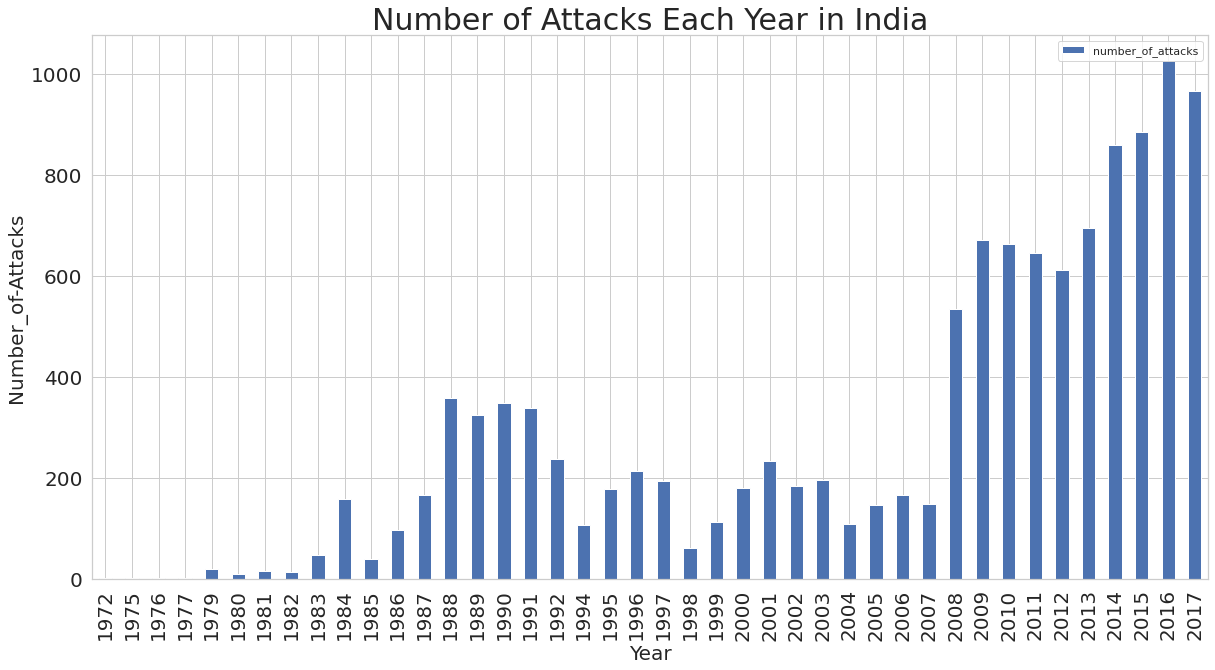

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
df_number_of_attacks_by_years.sort_values('year',ascending= True).plot(kind='bar',x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number_of-Attacks', fontsize=20)
plt.title('Number of Attacks Each Year in India', fontsize=30)

### **Conclusion** : Year 2016 has the highest number of attack in India with total number of 1025 attacks in a year.

# **11. No. of citizens killed each year in India**

In [ ]:
kills_per_year_india=df_India.groupby('year').agg({'total_kills':'sum'})
kills_per_year_india.reset_index(inplace=True)
kills_per_year_india.head(3)

,year,total_kills
0,1972,0.0
1,1975,4.0
2,1976,0.0


Text(0.5, 1.0, 'Total Number of Kills Each Year in India from 1970-2017')

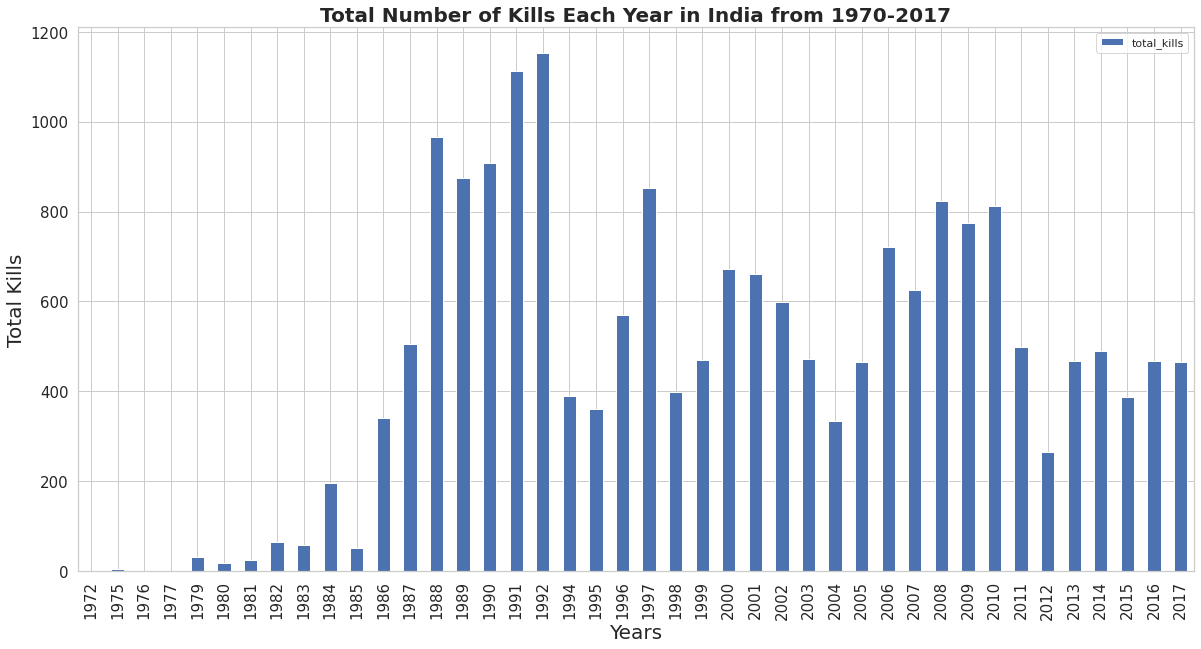

In [ ]:
kills_per_year_india.sort_values('year',ascending= True).plot(kind='bar',x='year',y='total_kills')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('Years', fontsize=20)
plt. ylabel('Total Kills', fontsize=20)
plt.title('Total Number of Kills Each Year in India from 1970-2017', fontsize=20,fontweight='bold')

###**Conclusion:** 1992 was the year where the most number of  citizen were killed with total number is 1152.

#**12. Target Wise Analysis in India**

In [ ]:
target_df=df_India[['target_type','total_kills']]

In [ ]:
target_df.target_type.isna().sum()

0

In [ ]:
target_wise=target_df.groupby('target_type').agg({'target_type':'count','total_kills':'sum'}).rename(columns={'target_type':'total_attacks'}).sort_values('total_attacks',ascending=False)
target_wise.head(3)

,total_attacks,total_kills
target_type,,
Private Citizens & Property,3144,7011.0
Police,2299,4275.0
Government (General),1727,1516.0


In [ ]:
target_wise['total_damage']=target_wise.total_attacks+target_wise.total_kills
target_wise.sort_values('total_damage',ascending=False)
target_wise.head(3)

,total_attacks,total_kills,total_damage
target_type,,,
Private Citizens & Property,3144,7011.0,10155.0
Police,2299,4275.0,6574.0
Government (General),1727,1516.0,3243.0


Text(0, 0.5, 'Type of Targets')

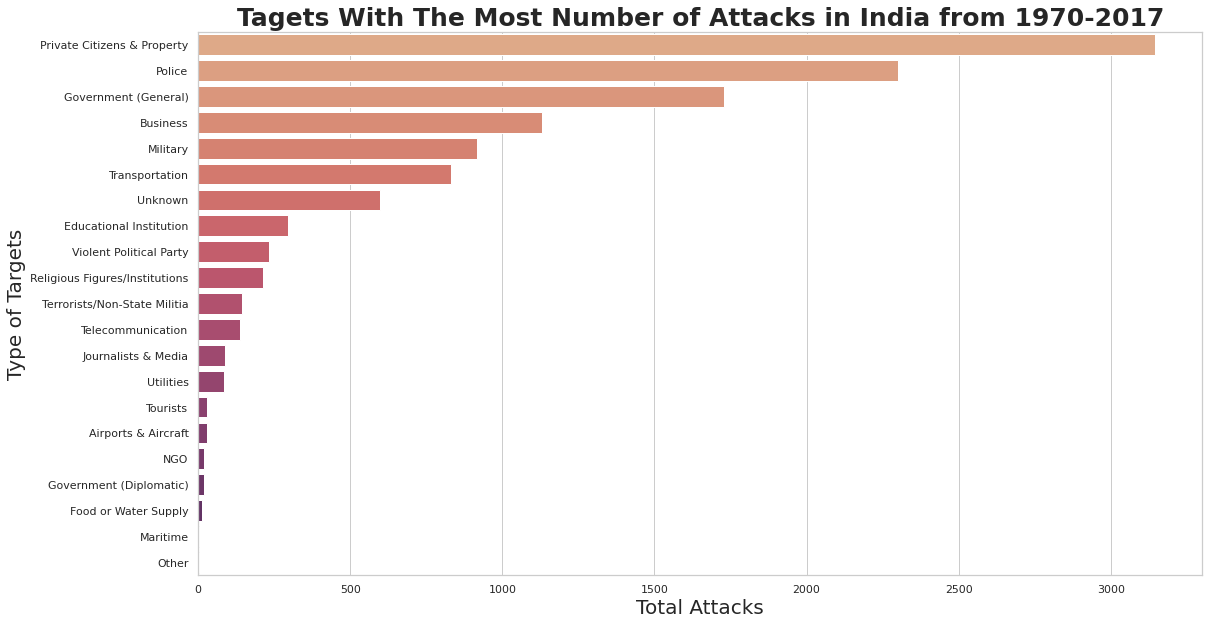

In [ ]:
plt.rcParams['figure.figsize']=(18,10)
sns.set(font_scale=1)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y=target_wise.index,data=target_wise,palette='flare')
l.set_title("Tagets With The Most Number of Attacks in India from 1970-2017",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Type of Targets',fontsize=20)

###**Conclusion:** Private Citizen and Property are the top taget with total of 3144 attacks.

#**13.Number of Attacks in Each City in India**

In [ ]:
df_India= sub_df[sub_df['country']=='India']
# country_IND=sub_df[sub_df['country']=='India']
city_known = df_India[df_India['city']!='Unknown']
state_city=city_known[['provstate','city']]
city_mode=state_city.groupby('provstate')['city'].apply(lambda x: x.mode().loc[0])
city_mode=city_mode.reset_index()
dict_=dict(zip(city_mode.provstate,city_mode.city))
df_India['new_city']=df_India.city.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i,row in df_India.iterrows():
  if df_India.at[i,'provstate']!='Unknown':
    if df_India.at[i,'city']=='Unknown':
      df_India.at[i,'new_city']=dict_[row['provstate']]
    else:
      df_India.at[i,'new_city']=df_India.at[i,'new_city']

In [ ]:
df_India['city']= df_India['new_city']
df_number_of_attacks_by_cities =df_India['city'].value_counts().rename_axis('unique_cities').reset_index(name='number_of_attacks')
df_sorted_city_by_attacks= df_number_of_attacks_by_cities.sort_values(['number_of_attacks'], ascending= False).reset_index(drop= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:64: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


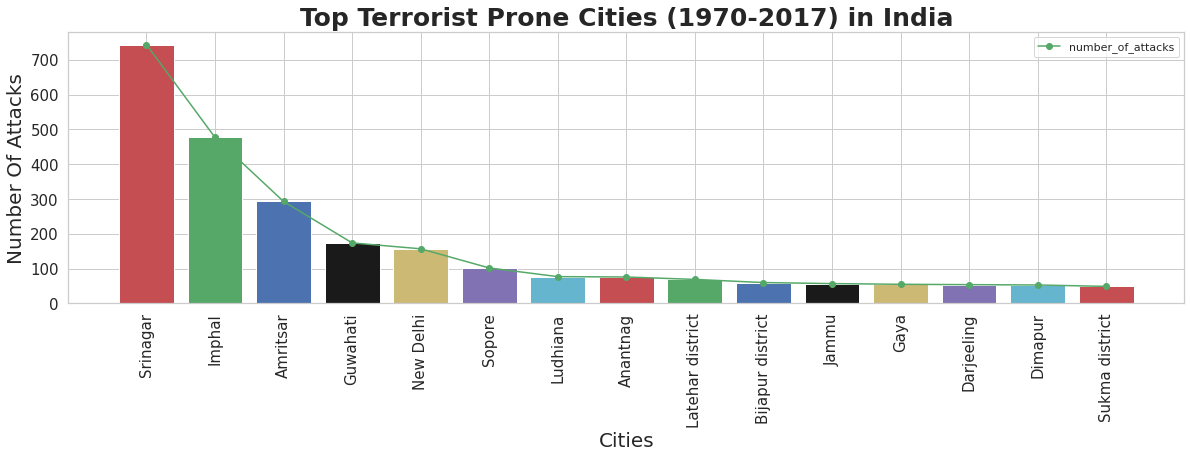

In [ ]:

plt.rcParams["figure.figsize"] = (20, 5)
df_sorted_city_by_attacks.head(15).plot(zorder=5,color='C2', marker='o')
plt.bar(df_sorted_city_by_attacks['unique_cities'].head(15),df_sorted_city_by_attacks['number_of_attacks'].head(15),color='rgbkymc')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('Cities', fontsize=20)
plt. ylabel('Number Of Attacks', fontsize=20)
plt.title("Top Terrorist Prone Cities (1970-2017) in India", fontsize=25, fontweight='bold')
plt.show()

**Conclusion**:Top Terrorist Prone City is: **Srinagar** 

#**14. Most Active Terrorist Group Statewise**

In [ ]:
df_India.replace('Orissa', 'Odisha', inplace= True)
df_India.replace('Jammu and Kashmir', 'Jammu & Kashmir', inplace= True)
df_India.replace('Andhra pradesh', 'Andhra Pradesh', inplace= True)
df_India.replace('Uttaranchal', 'Uttarakhand', inplace= True)
df_India.replace('Arunachal Pradesh', 'Arunanchal Pradesh', inplace= True)
df_India.replace('Delhi', 'NCT of Delhi', inplace= True)
indexNames = df_India[ df_India['provstate'] =='Unknown' ].index
df_India.drop(indexNames , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
statewise_terrorist_attack_group=pd.DataFrame(df_India, columns=['provstate','terrorist_group','attack_type','total_kills' ])
active_group= statewise_terrorist_attack_group.groupby(['provstate','terrorist_group']).agg({'terrorist_group':'count'}).rename(columns={'terrorist_group':'number of attacks'}).reset_index()
most_active_group=active_group.groupby("provstate").max().reset_index()
most_active_terror_group_statewise= most_active_group.sort_values('number of attacks', ascending= False)
most_active_terror_group_statewise=most_active_terror_group_statewise.nlargest(10,'number of attacks').sort_values('number of attacks',ascending=True)

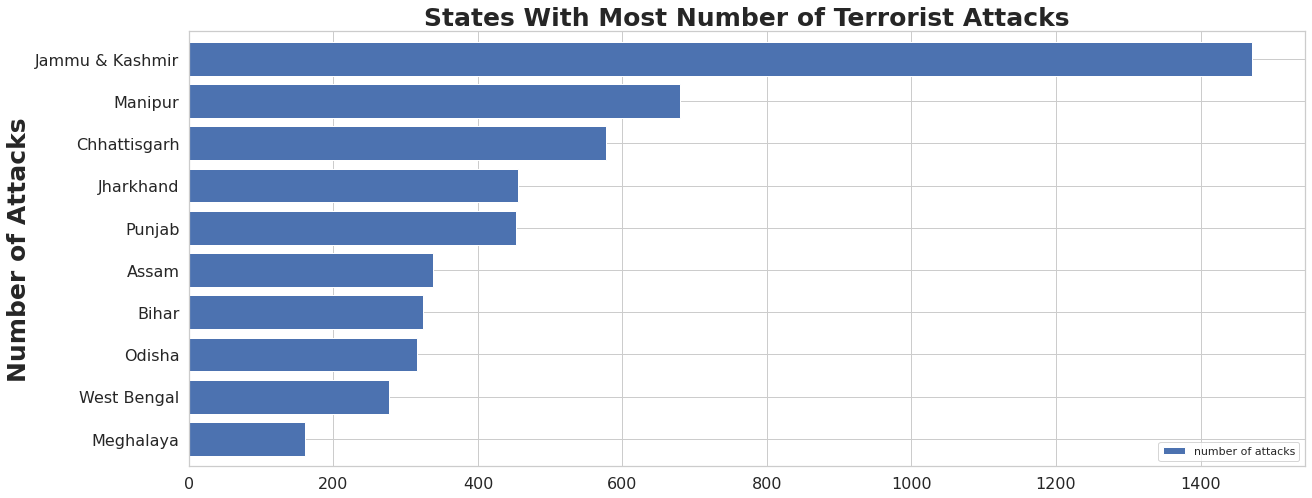

In [216]:
plt.rcParams["figure.figsize"] = (20, 8)
x1=most_active_terror_group_statewise['terrorist_group']
m = most_active_terror_group_statewise.plot(kind='barh',x='provstate',y='number of attacks', width=0.8)
m.set_xlabel('Total Number of Attacks',fontsize=15,fontweight='bold')
m.set_ylabel('Terrorist Group',fontsize=22,fontweight='bold')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt. xlabel('', fontsize=25, color='b')
plt. ylabel('Number of Attacks', fontsize=25)
plt.title('States With Most Number of Terrorist Attacks', fontsize=25,fontweight='bold')
plt.legend()

### **Conclusion**: 
1)Jammu and Kashmir has the highest number of attacks i.e 1471 attacks from the year 1970-2017.\
2)Most active terrorist group in Manipur is : Zomi Revolutionary Army (ZRA)	
3) Most active Terrorist Group in Chhattisgarh	is:Vishwa Hindu Parishad (VHP)
4) Mizoram, Goa, Sikkim and Puducherry are the least affected states in India.

# **15.Total Kills vs Type of Attack**

In [ ]:
terrorist_attack_group=pd.DataFrame(df_India, columns=['city','terrorist_group','attack_type','total_kills' ])
terrorist_attack_group.sort_values('total_kills', ascending= False)
index_names = terrorist_attack_group[ terrorist_attack_group['terrorist_group'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
index_names = terrorist_attack_group[ terrorist_attack_group['attack_type'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
terrorist_attack_group.head(3)

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0


In [ ]:
attack_type_killings= terrorist_attack_group.groupby(['attack_type'])['total_kills'].sum().rename_axis('attack_type').reset_index(name='total_kills')
attack_type_killings.sort_values('total_kills', ascending= False)

,attack_type,total_kills
0,Armed Assault,6926.0
2,Bombing/Explosion,4006.0
1,Assassination,1197.0
7,Others,848.0
6,Hostage Taking (Kidnapping),731.0
3,Facility/Infrastructure Attack,130.0
5,Hostage Taking (Barricade Incident),130.0
4,Hijacking,39.0
8,Unarmed Assault,21.0


Text(0.5, 1.0, 'Total Damage (1970-2017) vs Terrorist Attack Type in India')

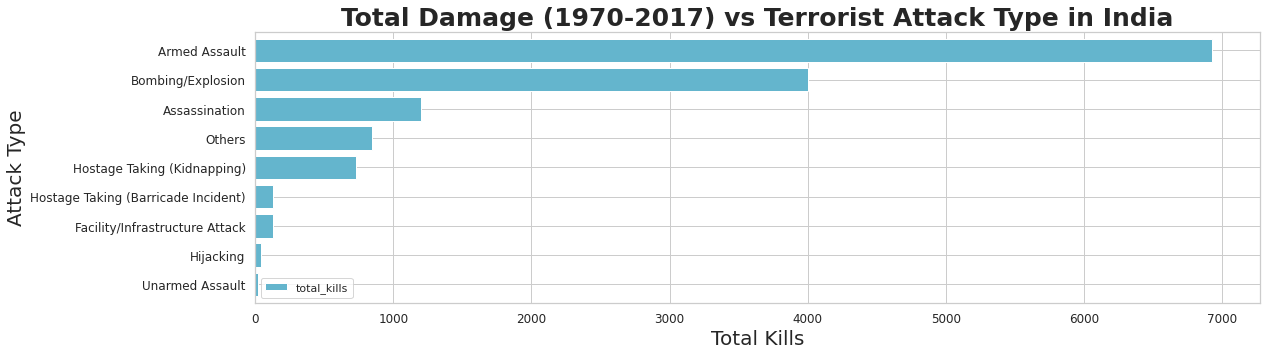

In [ ]:
plt.rcParams["figure.figsize"] = (18, 5)
attack_type_killings.sort_values('total_kills', ascending= True).plot(kind='barh',x='attack_type',color='c',y='total_kills', width=0.8)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('Total Kills', fontsize=20)
plt. ylabel('Attack Type', fontsize=20)
plt.title('Total Damage (1970-2017) vs Terrorist Attack Type in India', fontsize=25,fontweight='bold')

### **Conclusion**: Armed Assault has done higher amount(nearabout-7000 killings) of Damage